In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

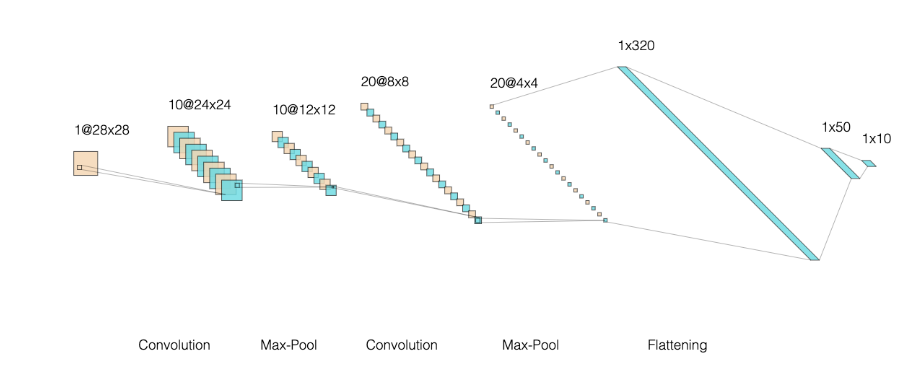

Courtesy : https://alexlenail.me/NN-SVG/LeNet.html

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d(p=0.2)
        self.maxpool2d = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(self.maxpool2d(self.conv1(x)))
        x = F.relu(self.maxpool2d(self.conv2_drop(self.conv2(x))))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
         MaxPool2d-2           [-1, 10, 12, 12]               0
            Conv2d-3             [-1, 20, 8, 8]           5,020
         Dropout2d-4             [-1, 20, 8, 8]               0
         MaxPool2d-5             [-1, 20, 4, 4]               0
            Linear-6                   [-1, 50]          16,050
            Linear-7                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.08
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


In [4]:

torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [5]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, epoch)
  test(model, device, test_loader)
  scheduler.step()
    


Epoch 1


loss=0.20852752029895782 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:18<00:00, 24.97it/s]



Test set: Average loss: 0.0948, Accuracy: 9696/10000 (97%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 2


loss=0.09031680971384048 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 24.51it/s]



Test set: Average loss: 0.0575, Accuracy: 9799/10000 (98%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


loss=0.18099559843540192 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 24.04it/s]



Test set: Average loss: 0.0489, Accuracy: 9834/10000 (98%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


loss=0.1042860671877861 batch_id=468: 100%|██████████████████████████████████████████| 469/469 [00:19<00:00, 23.64it/s]



Test set: Average loss: 0.0422, Accuracy: 9870/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


loss=0.06086336448788643 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 23.85it/s]



Test set: Average loss: 0.0380, Accuracy: 9888/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


loss=0.026231618598103523 batch_id=468: 100%|████████████████████████████████████████| 469/469 [00:19<00:00, 23.52it/s]



Test set: Average loss: 0.0359, Accuracy: 9891/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


loss=0.06386629492044449 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 23.75it/s]



Test set: Average loss: 0.0387, Accuracy: 9874/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


loss=0.04513847827911377 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 23.98it/s]



Test set: Average loss: 0.0320, Accuracy: 9899/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


loss=0.042241841554641724 batch_id=468: 100%|████████████████████████████████████████| 469/469 [00:19<00:00, 23.94it/s]



Test set: Average loss: 0.0296, Accuracy: 9901/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


loss=0.1057325005531311 batch_id=468: 100%|██████████████████████████████████████████| 469/469 [00:19<00:00, 23.73it/s]



Test set: Average loss: 0.0323, Accuracy: 9901/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 11


loss=0.0036726875696331263 batch_id=468: 100%|███████████████████████████████████████| 469/469 [00:19<00:00, 23.84it/s]



Test set: Average loss: 0.0287, Accuracy: 9906/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 12


loss=0.044070687144994736 batch_id=468: 100%|████████████████████████████████████████| 469/469 [00:20<00:00, 23.41it/s]



Test set: Average loss: 0.0291, Accuracy: 9907/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


loss=0.04807789996266365 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 24.28it/s]



Test set: Average loss: 0.0273, Accuracy: 9904/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


loss=0.07874850928783417 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 23.76it/s]



Test set: Average loss: 0.0281, Accuracy: 9909/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


loss=0.013947403989732265 batch_id=468: 100%|████████████████████████████████████████| 469/469 [00:19<00:00, 23.93it/s]



Test set: Average loss: 0.0272, Accuracy: 9907/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


loss=0.09213748574256897 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 23.98it/s]



Test set: Average loss: 0.0265, Accuracy: 9907/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


loss=0.07518137246370316 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 24.01it/s]



Test set: Average loss: 0.0254, Accuracy: 9920/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


loss=0.006022598594427109 batch_id=468: 100%|████████████████████████████████████████| 469/469 [00:19<00:00, 24.12it/s]



Test set: Average loss: 0.0242, Accuracy: 9915/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


loss=0.033428795635700226 batch_id=468: 100%|████████████████████████████████████████| 469/469 [00:19<00:00, 24.00it/s]



Test set: Average loss: 0.0279, Accuracy: 9907/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


loss=0.04953692480921745 batch_id=468: 100%|█████████████████████████████████████████| 469/469 [00:19<00:00, 23.63it/s]



Test set: Average loss: 0.0269, Accuracy: 9912/10000 (99%)

Adjusting learning rate of group 0 to 1.0000e-04.
